In [ ]:
import pandas as pd

In [ ]:
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows',None)

In [ ]:
df_train=pd.read_csv('/content/drugsComTrain_raw.csv')
df_test=pd.read_csv('/content/drugsComTest_raw.csv')

In [ ]:


# Concatenate DataFrames
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)



In [ ]:
df.shape

(215063, 7)

In [ ]:
df_train.shape

(161297, 7)

In [ ]:
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [ ]:
df.condition.value_counts()

condition
Birth Control                                                          38436
Depression                                                             12164
Pain                                                                    8245
Anxiety                                                                 7812
Acne                                                                    7435
Bipolar Disorde                                                         5604
Insomnia                                                                4904
Weight Loss                                                             4857
Obesity                                                                 4757
ADHD                                                                    4509
Diabetes, Type 2                                                        3362
Emergency Contraception                                                 3290
High Blood Pressure                                               

In [ ]:
df_train = df[((df['condition'] == 'Birth Control') |
               (df['condition'] == 'Depression') |
               (df['condition'] == 'Pain') |
               (df['condition'] == 'Anxiety') |
               (df['condition'] == 'Acne') |
               (df['condition'] == 'Bipolar Disorde') |
               (df['condition'] == 'Insomnia') |
               (df['condition'] == 'Weight Loss') |
               (df['condition'] == 'Obesity') |
               (df['condition'] == 'ADHD') |

               (df['condition'] == 'Diabetes, Type 2') |
               (df['condition'] == 'Emergency Contraception') |
               (df['condition'] == 'High Blood Pressure') |
               (df['condition'] == 'Vaginal Yeast Infection') |
               (df['condition'] == 'Abnormal Uterine Bleeding') |
               (df['condition'] == 'Bowel Preparation') |

               (df['condition'] == 'Smoking Cessation') |
               (df['condition'] == 'Migraine') |
               (df['condition'] == 'Anxiety and Stress') |
               (df['condition'] == 'Major Depressive Disorder') |
               (df['condition'] == 'Constipation') |
               (df['condition'] == 'Chronic Pain') )]


In [ ]:
df.shape

(215063, 7)

In [ ]:
df_train.shape

(127819, 7)

In [ ]:
X=df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [ ]:
X.condition.value_counts()

condition
Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
Migraine                      2277
Anxiety and Stress            2236
Constipation                  2120
Chronic Pain                  1940
Name: count, dtype: int64

In [ ]:
X.head()

condition                                             review
1                     ADHD  "My son is halfway through his fourth week of ...
2            Birth Control  "I used to take another oral contraceptive, wh...
3            Birth Control  "This is my first time using any form of birth...
6  Emergency Contraception  "He pulled out, but he cummed a bit in me. I t...
7          Bipolar Disorde  "Abilify changed my life. There is hope. I was...

In [ ]:
# Filter for each condition separately
X_birth = X[X['condition'] == 'Birth Control']
X_dep = X[X['condition'] == 'Depression']
X_high = X[X['condition'] == 'High Blood Pressure']
X_diab = X[X['condition'] == 'Diabetes, Type 2']
X_anxiety = X[X['condition'] == 'Anxiety']
X_acne = X[X['condition'] == 'Acne']
X_bipolar = X[X['condition'] == 'Bipolar Disorde']
X_insomnia = X[X['condition'] == 'Insomnia']
X_weight_loss = X[X['condition'] == 'Weight Loss']
X_obesity = X[X['condition'] == 'Obesity']
X_adhd = X[X['condition'] == 'ADHD']
X_emergency = X[X['condition'] == 'Emergency Contraception']
X_yeast_infection = X[X['condition'] == 'Vaginal Yeast Infection']
X_abnormal_bleeding = X[X['condition'] == 'Abnormal Uterine Bleeding']
X_bowel_preparation = X[X['condition'] == 'Bowel Preparation']
X_smoking_cessation = X[X['condition'] == 'Smoking Cessation']
X_migraine = X[X['condition'] == 'Migraine']
X_anxiety_stress = X[X['condition'] == 'Anxiety and Stress']

X_constipation = X[X['condition'] == 'Constipation']
X_chronic_pain = X[X['condition'] == 'Chronic Pain']


Text(0.5, 1.0, 'Wordcloud for Birth Control')

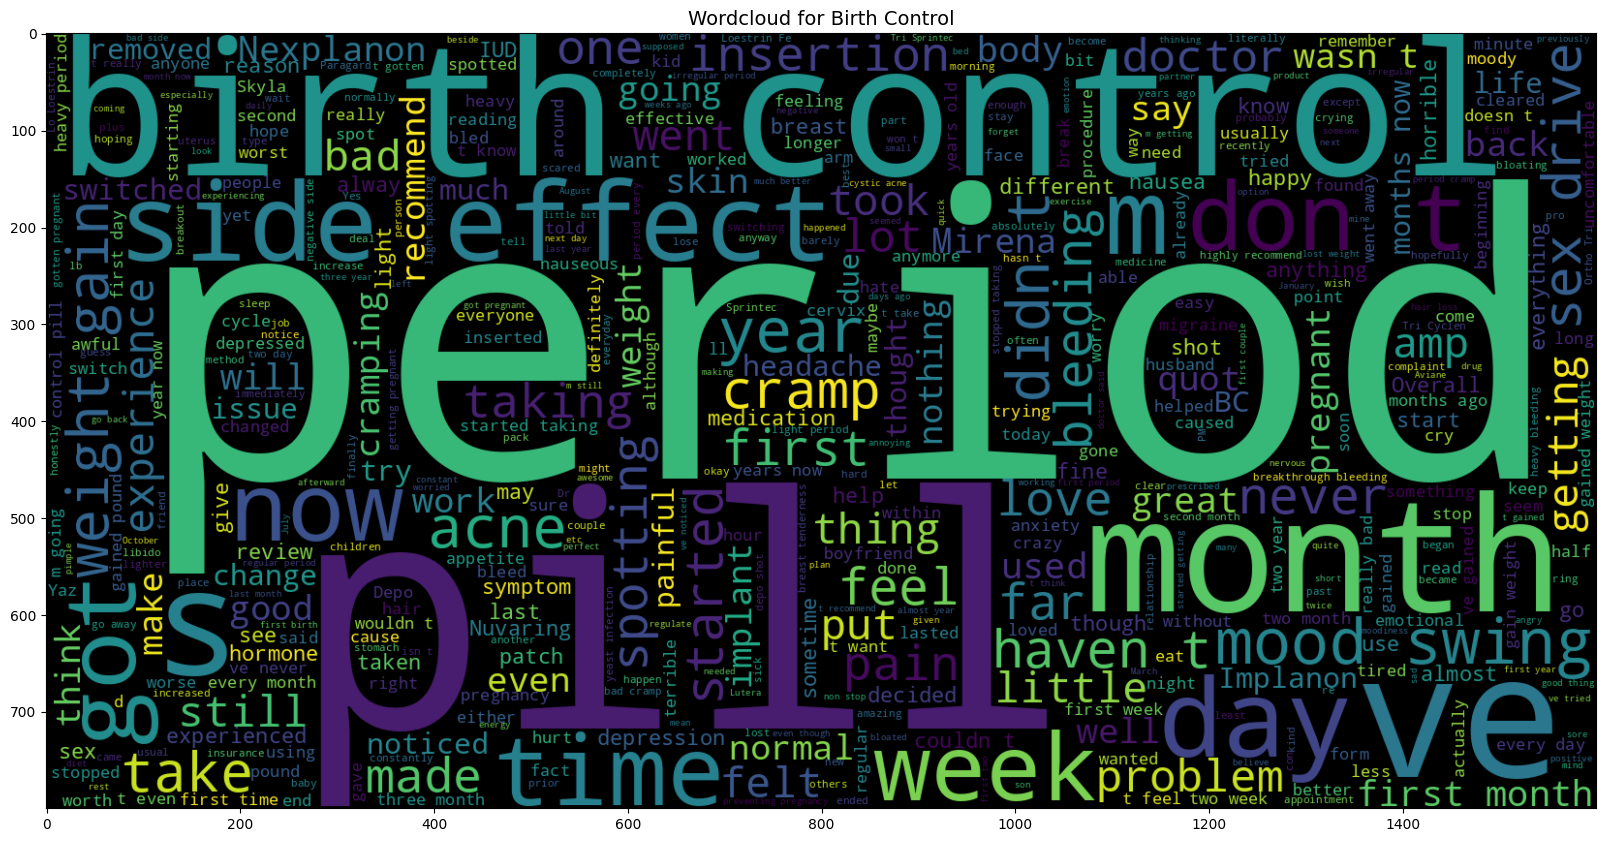

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(' '.join(X_birth['review']))
plt.imshow(wc,interpolation='bilinear')
plt.title('Wordcloud for Birth Control',fontsize=14)

Text(0.5, 1.0, 'Wordcloud for Depression')

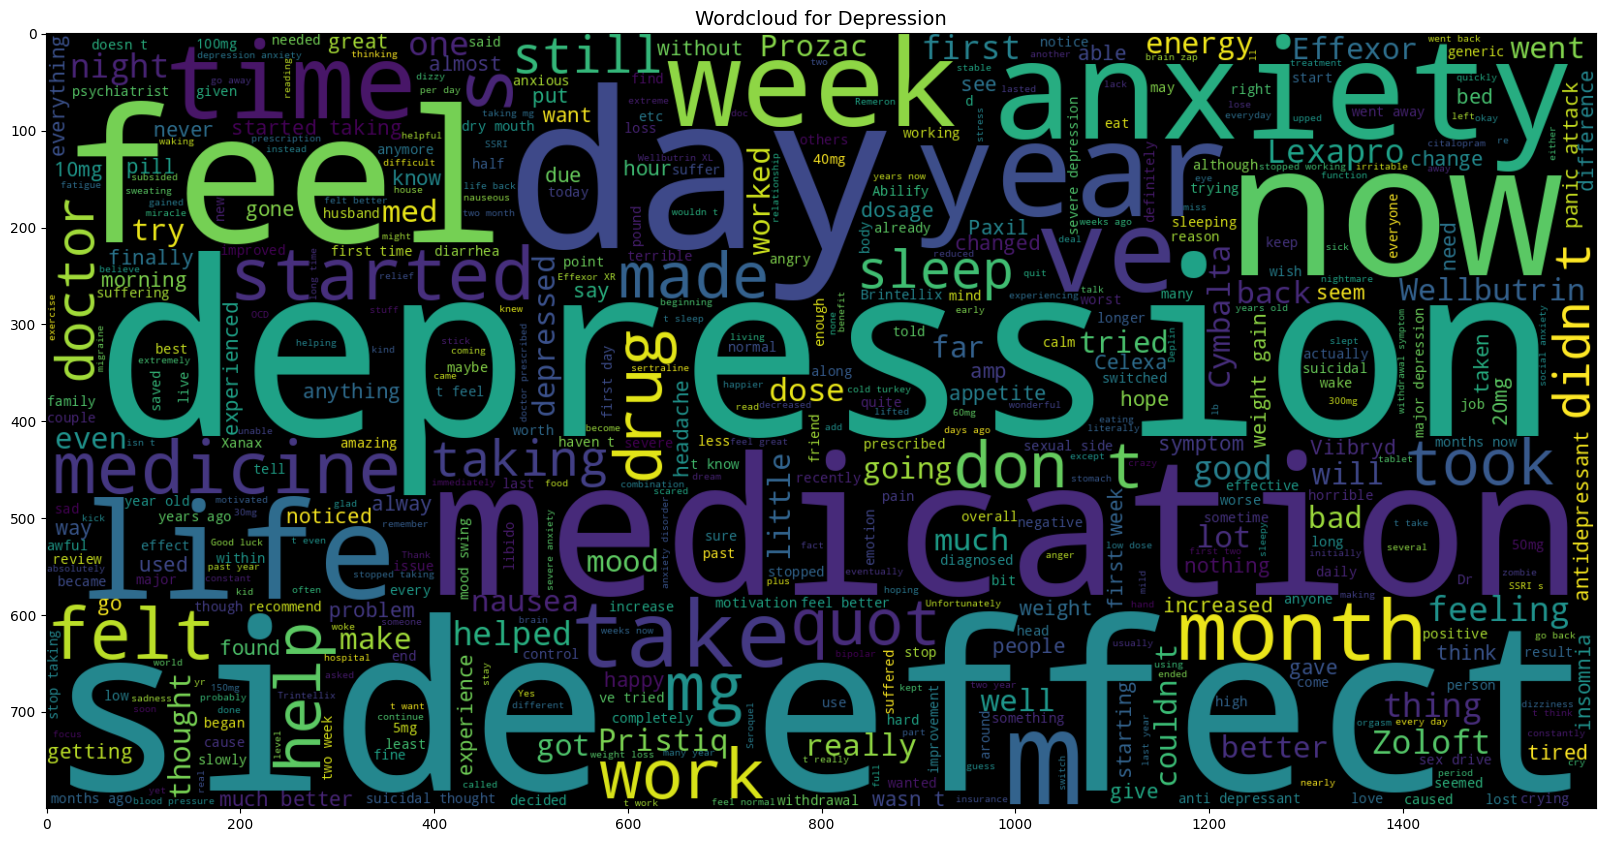

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(' '.join(X_dep['review']))
plt.imshow(wc,interpolation='bilinear')
plt.title('Wordcloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word Cloud for High Blood Pressure')

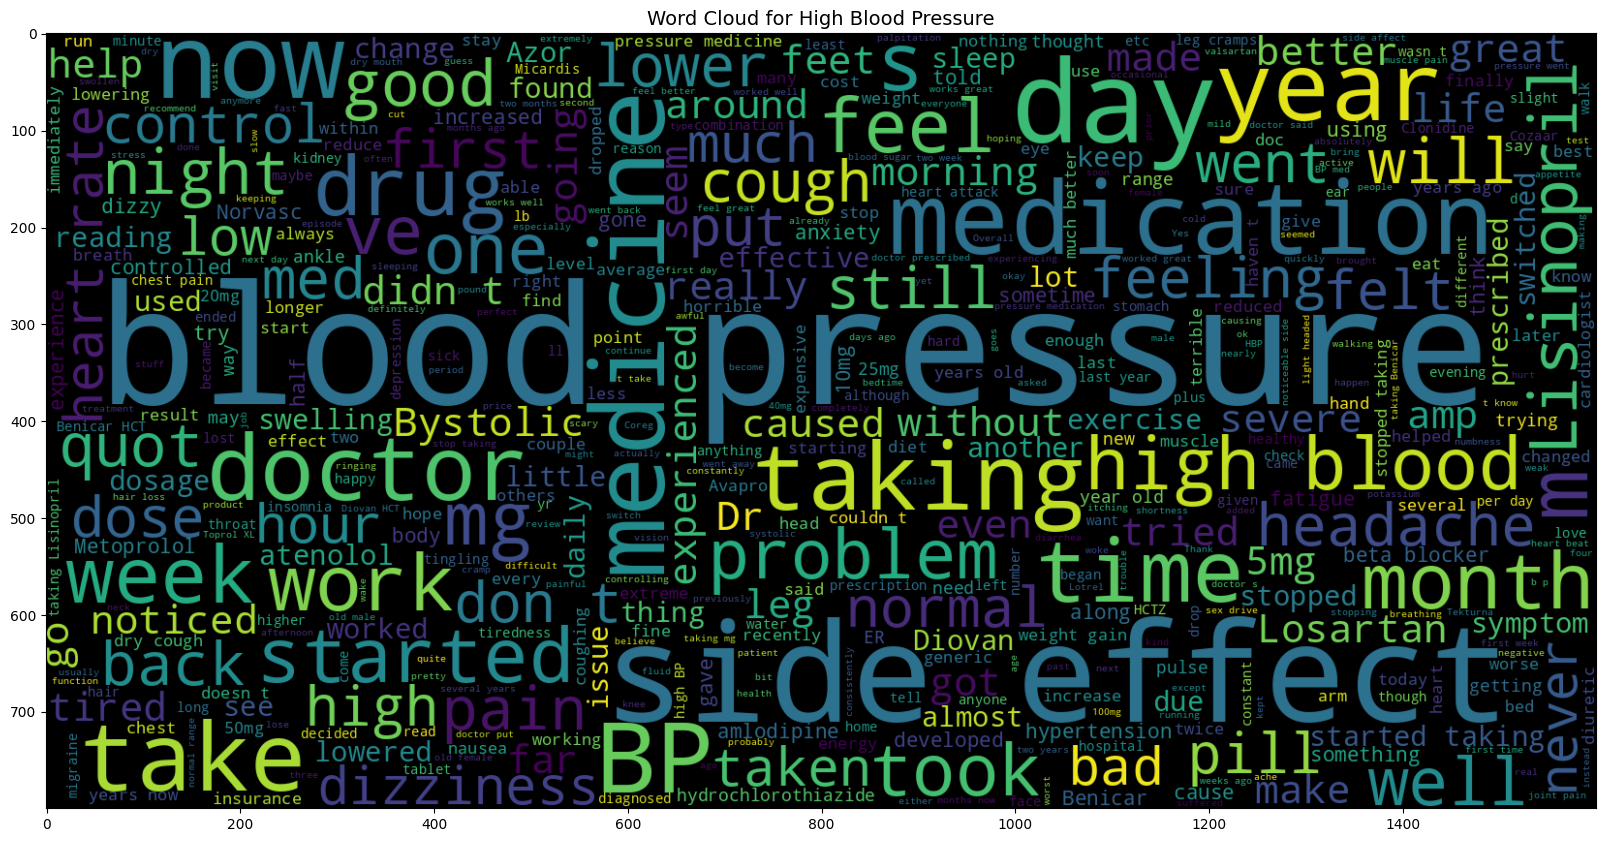

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(' '.join(X_high['review']))
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word Cloud for Diabetes Type 2')

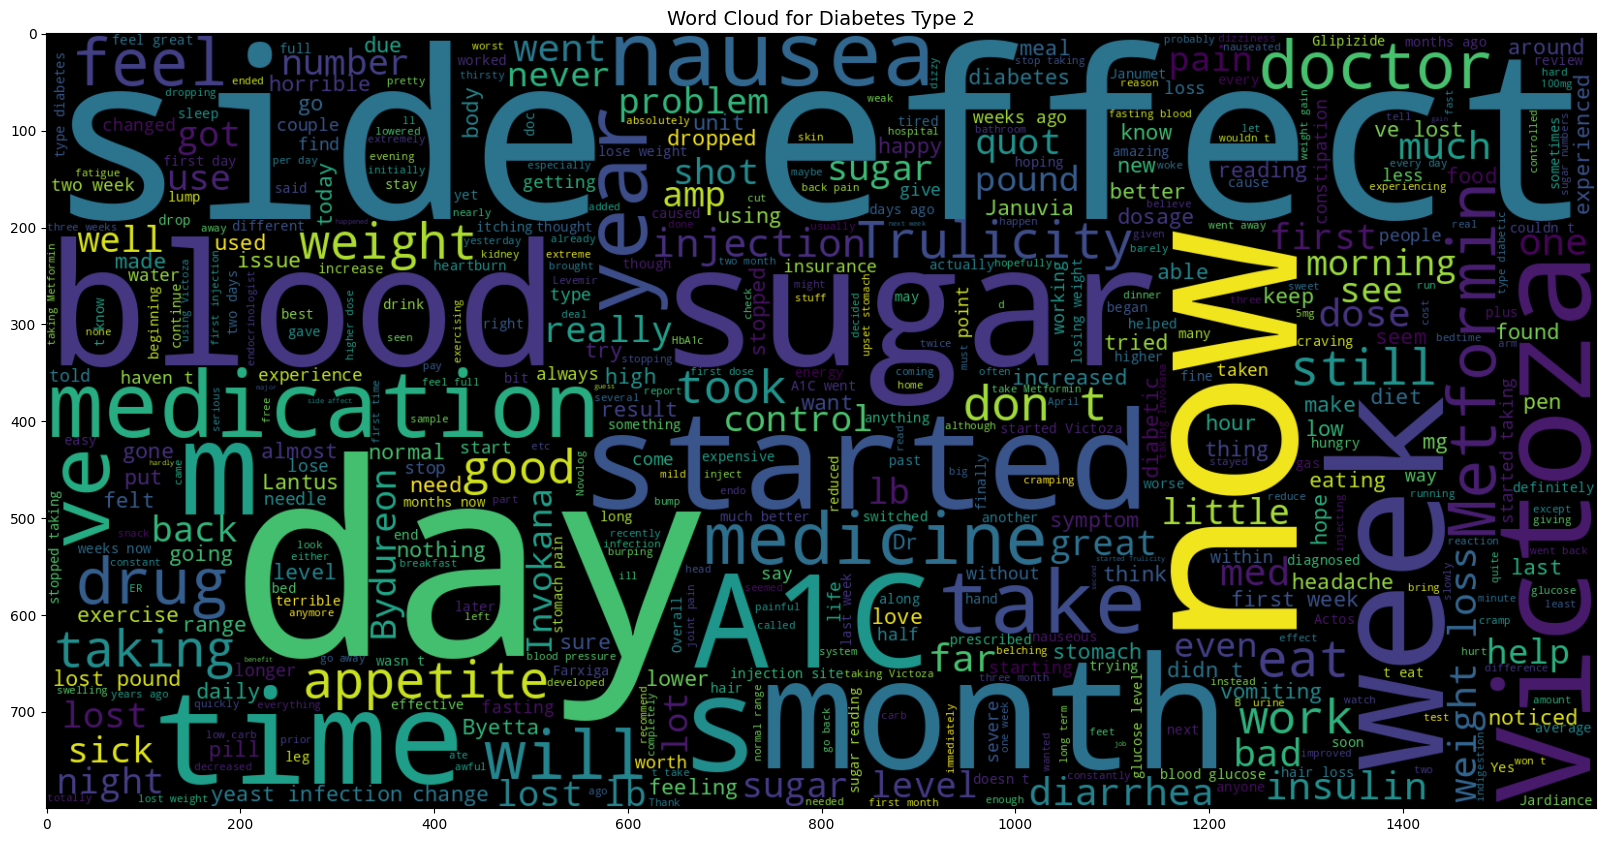

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500,width=1600,height=800).generate(" ".join(X_diab.review))
plt.imshow(wc,interpolation='bilinear')
plt.title('Word Cloud for Diabetes Type 2',fontsize=14)

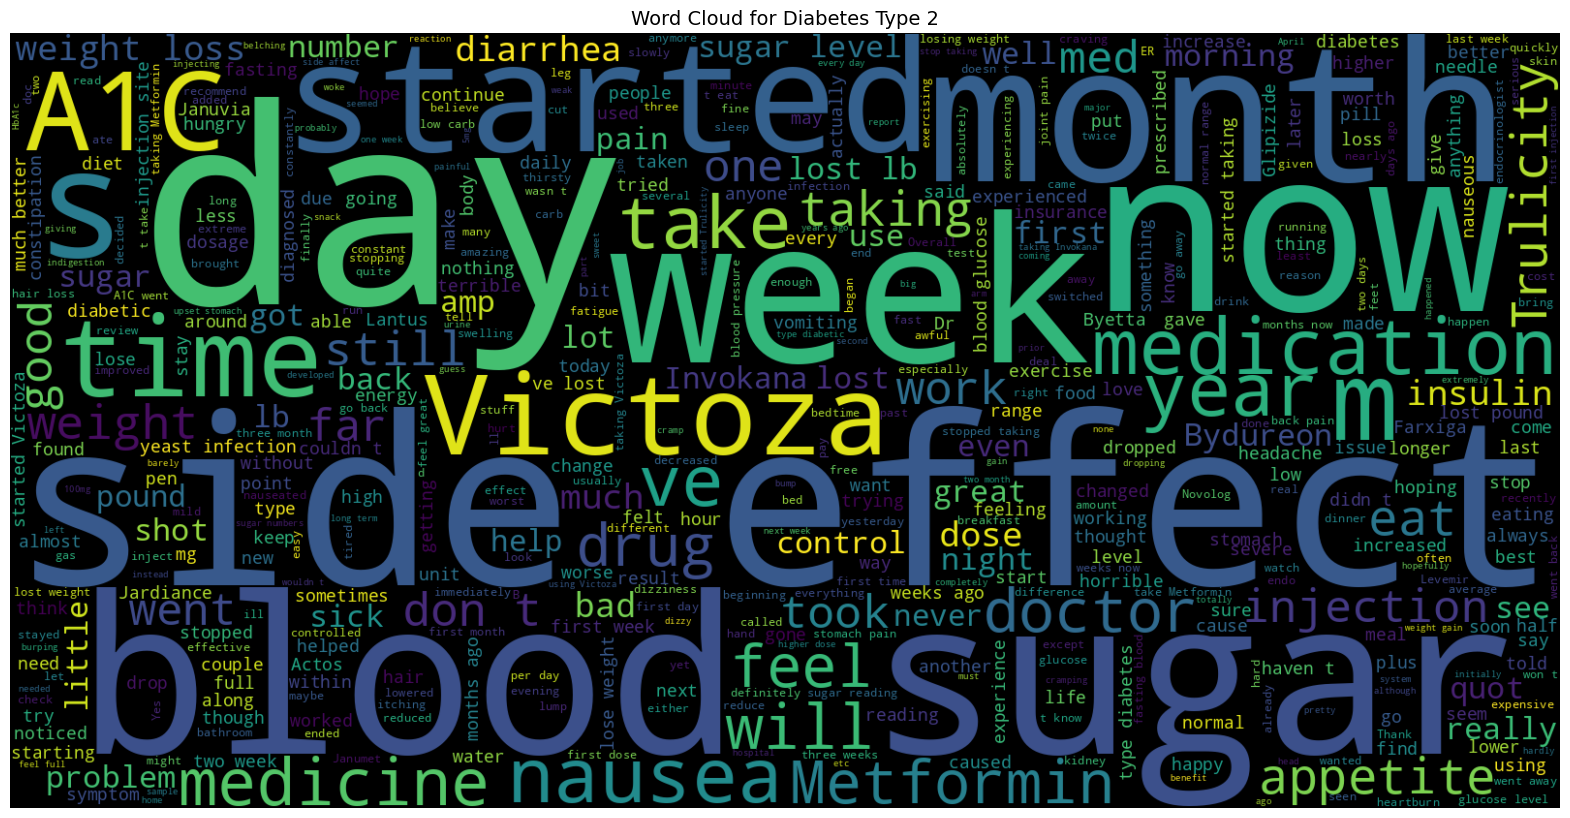

In [ ]:
# Check if X_diab has any data
if X_diab.empty:
    print("The DataFrame X_diab is empty.")
else:
    # Check if the 'review' column in X_diab is empty or contains only NaN values
    if X_diab['review'].dropna().empty:
        print("The 'review' column in X_diab is empty or contains only NaN values.")
    else:
        # Proceed to generate the word cloud
        reviews = " ".join(X_diab['review'].dropna().astype(str))
        if reviews.strip() == "":
            print("The 'review' column does not contain any valid words to generate a word cloud.")
        else:
            plt.figure(figsize=(20, 20))
            wc = WordCloud(max_words=500, width=1600, height=800).generate(reviews)
            plt.imshow(wc, interpolation='bilinear')
            plt.title('Word Cloud for Diabetes Type 2', fontsize=14)
            plt.axis('off')
            plt.show()


In [ ]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
X['review'][9]

'"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."'

In [ ]:
for i, col in enumerate(X.columns):
  X.iloc[:,i]=X.iloc[:,i].str.replace('"','')

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
X.head()

condition  \
1                     ADHD   
2            Birth Control   
3            Birth Control   
6  Emergency Contraception   
7          Bipolar Disorde   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
1                My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.  
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.  
7                          Abil

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [ ]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [ ]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
def review_2_words(raw_review):
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()
  letters_only=re.sub('[^a-zA-Z]',' ', review_text)
  words=letters_only.lower().split()
  meaningful_words = [w for w in words if not w in stop]
  lemmitize_words=[lemmatizer.lemmatize(w) for w in meaningful_words]
  return(' '.join(lemmitize_words))


In [ ]:
X['review_clean']=X['review'].apply(review_2_words)


<ipython-input-38-a7da30278950>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text=BeautifulSoup(raw_review,'html.parser').get_text()


In [ ]:
X.head()

condition  \
1                     ADHD   
2            Birth Control   
3            Birth Control   
6  Emergency Contraception   
7          Bipolar Disorde   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
1                My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.   
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
6                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnancy test two weeks later - - I&#039;m pregnant.   
7                         

In [ ]:
X_feat=X['review_clean']
y=X['condition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y, test_size=0.2, random_state=40)

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Example usage:
# Assuming `cm` is your confusion matrix and `classes` is the list of class names
# plot_confusion_matrix(cm, classes, normalize=True)


In [ ]:


count_vectorizer = CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

accuracy: 0.827
Confusion matrix, without normalization


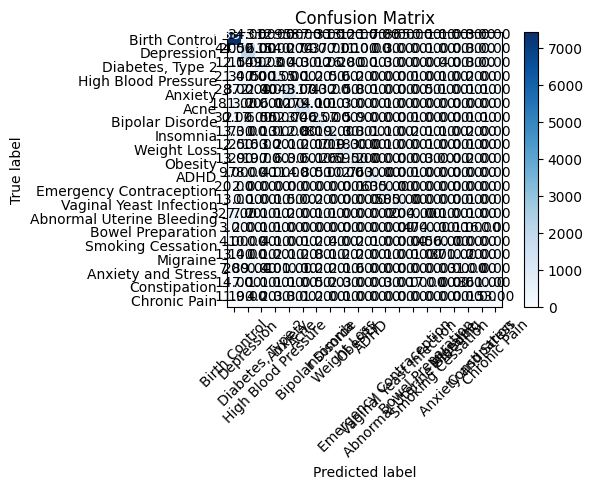

In [ ]:
mnb=MultinomialNB()
mnb.fit(count_train, y_train)
pred=mnb.predict(count_test)
score=metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain',
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)


accuracy: 0.853
Confusion matrix, without normalization


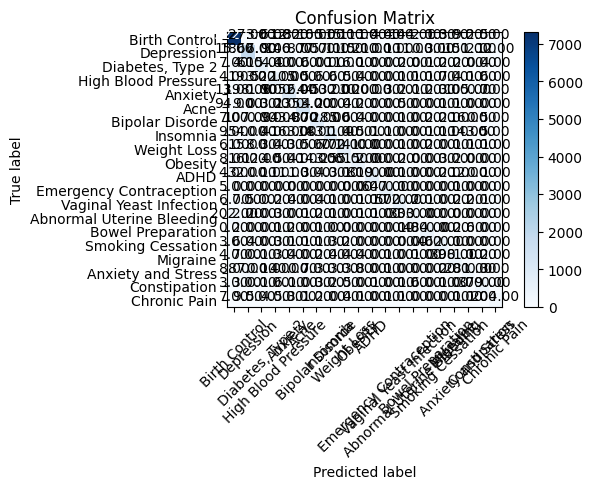

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
passive=PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred=passive.predict(count_test)
score=metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)


# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain',
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer (stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

accuracy: 0.661
Confusion matrix, without normalization


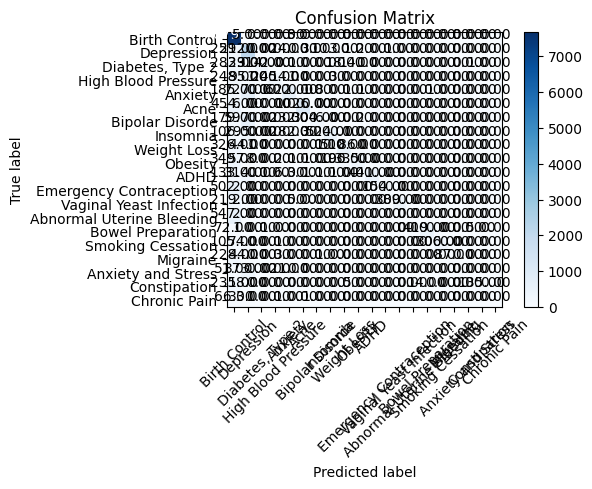

In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain',
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)


accuracy: 0.886
Confusion matrix, without normalization


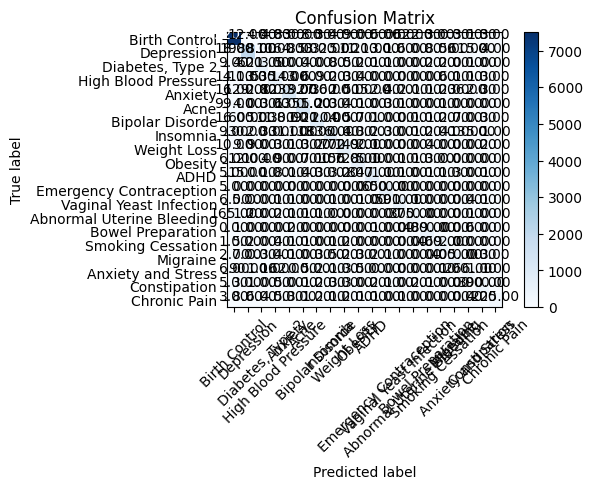

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain',
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer (stop_words='english', max_df=0.8, ngram_range=(1,2))

tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)

tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy: 0.931
Confusion matrix, without normalization


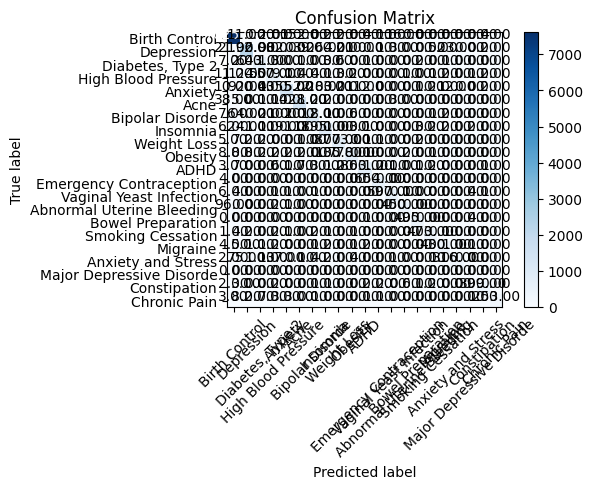

In [ ]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress',
                    'Major Depressive Disorde', 'Constipation', 'Chronic Pain',
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)

Accuracy: 0.932
Confusion matrix, without normalization


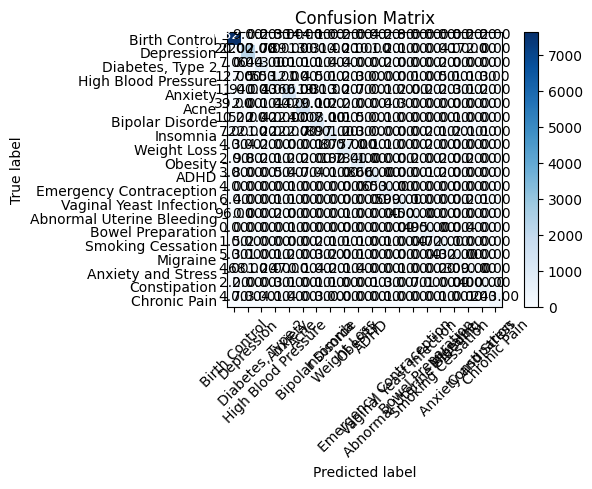

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Define the TF-IDF Vectorizer
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 3))

# Fit and transform the training data
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)

# Transform the test data
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

# Initialize the classifier
pass_tf = PassiveAggressiveClassifier()

# Fit the classifier
pass_tf.fit(tfidf_train_3, y_train)

# Predict the test set results
pred = pass_tf.predict(tfidf_test_3)

# Calculate the accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)


# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain'
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)



# Define the function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Define the TF-IDF Vectorizer with different parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 3))

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
tfidf_test = tfidf_vectorizer.transform(X_test)

# Define classifiers
passive_agg = PassiveAggressiveClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Use GridSearchCV to find the best hyperparameters for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(tfidf_train, y_train)

best_rf = grid_search.best_estimator_

# Create an ensemble of the best models
ensemble = VotingClassifier(estimators=[
    ('passive_agg', passive_agg),
    ('best_rf', best_rf),
    ('svm', svm)
], voting='hard')

# Fit the ensemble classifier
ensemble.fit(tfidf_train, y_train)

# Predict the test set results
pred = ensemble.predict(tfidf_test)

# Calculate the accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain'
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Define the function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)
plt.show()


Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import numpy as np
import itertools
import matplotlib.pyplot as plt
from scipy.stats import randint

# Define the TF-IDF Vectorizer with different parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1, 3))

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
tfidf_test = tfidf_vectorizer.transform(X_test)

# Define classifiers
passive_agg = PassiveAggressiveClassifier()
random_forest = RandomForestClassifier()
svm = SVC(probability=True)  # Enable probability estimates for VotingClassifier

# Use RandomizedSearchCV to find the best hyperparameters for RandomForestClassifier
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist,
                                   n_iter=20, cv=2, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(tfidf_train, y_train)

best_rf = random_search.best_estimator_

# Create an ensemble of the best models
ensemble = VotingClassifier(estimators=[
    ('passive_agg', passive_agg),
    ('best_rf', best_rf),
    ('svm', svm)
], voting='soft')  # Use soft voting for better performance

# Fit the ensemble classifier
ensemble.fit(tfidf_train, y_train)

# Predict the test set results
pred = ensemble.predict(tfidf_test)

# Calculate the accuracy score
score = metrics.accuracy_score(y_test, pred)
print("Accuracy: %0.3f" % score)

# Define all condition labels
condition_labels = ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain'
                    ]

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=condition_labels)

# Define the function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plot_confusion_matrix(cm, classes=condition_labels)
plt.show()


Fitting 2 folds for each of 20 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names), reverse=True)[:n]

    print(f"Top {n} features for class '{classlabel}':")
    for coef, feat in topn:
        print(f"{feat}: {coef:.4f}")

# Example usage for each condition:
conditions=         ['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure',
                    'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity',
                    'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                    'Abnormal Uterine Bleeding', 'Bowel Preparation',
                    'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain'
                    ]

for condition in conditions:
    most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, condition)
    print("-" * 50)  # Separating different conditions for clarity


Top 10 features for class 'Birth Control':
nexplanon: 10.0104
implant: 8.0431
implanon: 7.9957
nuvaring: 7.2666
skyla: 6.1605
insertion: 6.0998
pregnant: 5.8589
removed: 5.8020
period: 5.7860
moody: 5.6965
--------------------------------------------------
Top 10 features for class 'Depression':
depression: 11.5221
brintellix: 8.1390
viibryd: 7.9440
pristiq: 6.5250
wellbutrin: 6.2327
antidepressant: 6.0523
trintellix: 5.2667
zoloft: 4.7610
deplin: 4.4555
effexor: 4.3773
--------------------------------------------------
Top 10 features for class 'Diabetes, Type 2':
metformin: 9.0150
trulicity: 7.9112
sugar: 7.0163
invokana: 6.4819
byetta: 6.2110
bydureon: 6.1694
victoza: 5.7611
glucose: 5.3859
januvia: 5.3518
insulin: 4.8039
--------------------------------------------------
Top 10 features for class 'High Blood Pressure':
bp: 8.3550
lisinopril: 7.8735
cough: 6.1582
pressure: 6.0719
amlodipine: 5.6924
losartan: 5.2231
bystolic: 5.1238
benicar: 5.0575
diovan: 4.0783
metoprolol: 3.8605
-

In [ ]:
X.tail()

condition  \
215056  Birth Control   
215057  Birth Control   
215059        Anxiety   
215060  Birth Control   
215061           Pain   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            review  \
215056                                                                    I was on Microgestin for about 3 years. Over the past year, I started to get extremely bad headaches during the sugar pill week. I took extra strength Tylenol the entire week, twice a day, and it still didn&#039;t make my headaches go away. I also would feel very lightheaded and nauseous. I had to leave work early, it was bad. The only good thing was I&#039;ve had the same box of tampons for the entire year. I barely had a period. Oh yeah, I also got high pigmentation right above my lips. They call it a &quot;pregnancy mask&quot; but you can get it with certain birth control. It is very dark and it is difficult to hide with makeup! I&#039;m not a big fan of having a weird skin mustache so I went off it.   
215057                                                                                                                                                                                                                                                                                                         I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with them. They&#039;ve been unnoticeable and my cramps don&#039;t even exist anymore. I love Apri and it&#039;s affordable. Just what I need in this economic clash.   
215059                   I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt really sick the first two weeks on this drug. But you HAVE to give the drug time. For me, I didn&#039;t really start noticing the drugs positive effects for about two months. I took Zoloft before this and felt like it made me too tired and absent-minded. Luckily, Lexapro doesn&#039;t seem to have this effect (although I do drink caffeinated drinks). I like Lexapro not only because my anxiety and depression is completely gone, but I feel like I can finally handle everything in my life now (I&#039;m a working full-time college student). I highly recommend this drug.   
215060  I&#039;m married, 34 years old and I have no kids. Taking the pill was such a hassle so I decided to get the Mirena. It was very painful when it was inserted,then had cramping for the rest of that day! For the first 6 weeks I spotted off and on and then my periods just stopped. I still got cramps every few months, but never needed to take anything. The 5th and final year of me having Mirena, I started to spot monthly. I called my OB, they just said that the levonorgestrel wears off over time. I made the decision that I was going to have another one put in. Taking the old one out didn&#039;t hurt at all, you feel a little pressure. Inserting the new one was less painful but still uncom

In [ ]:


# Function for Extracting Top drugs
def top_drugs_extractor(condition):
    # Filter the DataFrame for ratings >= 9 and usefulCount >= 100
    df_top = df[(df['rating'] >= 9) & (df['usefulCount'] >= 100)]

    # Sort the DataFrame by 'rating' and 'usefulCount' in descending order
    df_top = df_top.sort_values(by=['rating', 'usefulCount'], ascending=[False, False])

    # Filter by the specified condition and get the top 3 drug names
    drug_list = df_top[df_top['condition'] == condition]['drugName'].head(3).tolist()

    return drug_list

# Example usage:
# top_drugs = top_drugs_extractor('Depression')
# print(top_drugs)


In [ ]:
def predict_text(lst_text):
  df_test=pd.DataFrame(lst_text,columns=['test_sent'])
  df_test['test_sent']=df_test["test_sent"].apply(review_2_words)
  tfidf_bigram=tfidf_vectorizer3.transform(lst_text)
  prediction=pass_tf.predict(tfidf_bigram)
  df_test['prediction']=prediction
  return df_test

In [ ]:
sentences = [

"I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hy.."
"This is the third med I have tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am s.."
"I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down t.."

]

In [ ]:
# Assuming tfidf_vectorizer3 and pass_tf are defined and trained
# Assuming top_drugs_extractor function is defined correctly

tfidf_trigram = tfidf_vectorizer3.transform(sentences)
predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label in ['High Blood Pressure', 'Depression', 'Diabetes, Type 2', 'Birth Control',
                 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss',
                 'Obesity', 'ADHD', 'Emergency Contraception', 'Vaginal Yeast Infection',
                 'Abnormal Uterine Bleeding', 'Bowel Preparation',
                 'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Constipation', 'Chronic Pain',
                 'Panic Disorde', 'Migraine Prevention', 'Urinary Tract Infection',
                 'Muscle Spasm', 'Osteoarthritis']:

        target = label
        top_drugs = top_drugs_extractor(label)

        print("text:", text, "\nCondition:", target)
        print("Top 3 suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print("-" * 50)  # Separator for clarity


text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hy..This is the third med I have tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am s..I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down t.. 
Condition: Diabetes, Type 2
Top 3 suggested Drugs:
Victoza
Liraglutide
Canagliflozin
--------------------------------------------------


In [ ]:
df_testsent=predict_text(sentences)
df_testsent

test_sent  \
0  tekturna day effect immediate also calcium channel blocker tiazac hy third med tried anxiety mild depression week hate much got diagnosed type doctor prescribed invokana metformin beginning sugar went   

         prediction  
0  Diabetes, Type 2

In [ ]:
import joblib

joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pk1')

joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [ ]:
vectorizer = joblib.load('tfidfvectorizer.pk1')

model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on"]))

test[0]

'High Blood Pressure'

In [ ]:
!pip install flask-ngrok
!pip install joblib


In [ ]:
from flask import Flask, request, jsonify, render_template
import joblib
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

# Load the model and vectorizer
model = joblib.load('passmodel.pkl')
vectorizer = joblib.load('tfidfvectorizer.pk1')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/diagnose', methods=['POST'])
def diagnose():
    data = request.get_json(force=True)
    symptoms = data['symptoms']

    # Make prediction
    prediction = model.predict(vectorizer.transform([symptoms]))[0]

    # Define a response structure
    response = {
        'disease': prediction,
        'medications': ['Med1', 'Med2', 'Med3']  # Replace with actual logic to get medications
    }

    return jsonify(response)

if __name__ == '__main__':
    app.run()
